In [52]:
import os
import numpy as np
from tools import analysistools as atools
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [4]:
buddf = pd.read_csv('/Users/joelforster/Projects/optidb/clus/budtime.csv')

In [26]:
buddf[buddf["name"].str.contains("243863")]

,Unnamed: 0,name,ga_budtime,budtime
1773,1773,243863_12900_0_out,12900,10200


In [94]:
xmp = np.sort(buddf[(buddf.ga_budtime >0)&(buddf.budtime>0)]['budtime'].unique())
xm = []
ym = []
for i in xmp:
    yl = buddf[(buddf.ga_budtime == i)&(buddf.budtime>0)]['budtime']
    if len(yl) > 1:
        ym.append(np.mean(yl))
        xm.append(i)
    
print xm,ym

[11600, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 14000, 14100, 14600, 14700, 15000, 15300, 15400, 16100, 16200, 16400, 16800, 17000, 17500, 18300, 19100, 19300, 19700, 20200, 20300, 20800, 21200, 21800, 22000, 22100, 22500, 24400] [17350.0, 10200.0, 20850.0, 16400.0, 20200.0, 14600.0, 14948.046875, 18800.0, 18126.666666666668, 13766.666666666666, 18700.0, 17350.0, 20966.666666666668, 17320.0, 18450.0, 15500.0, 18900.0, 21500.0, 13450.0, 21000.0, 16400.0, 19950.0, 18585.185185185186, 16966.666666666668, 18689.473684210527, 19647.272727272728, 20300.0, 22500.0, 17722.105263157893, 17900.0, 18100.0, 22700.0, 18200.0, 17000.0]


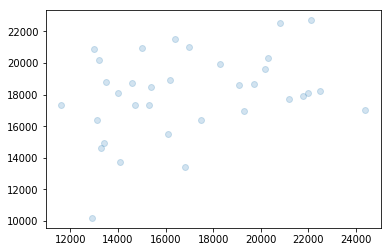

In [99]:
x = buddf[(buddf.ga_budtime >0)&(buddf.budtime>0)]['ga_budtime']
y = buddf[(buddf.ga_budtime >0)&(buddf.budtime>0)]['budtime']

plt.scatter(xm,ym,alpha=0.2)

fit = np.polyfit(xm,ym,1)
fit_fn = np.poly1d(fit)
yfit = lambda x: (fit_fn(x))

# plt.plot(x, yfit(x), '--k')

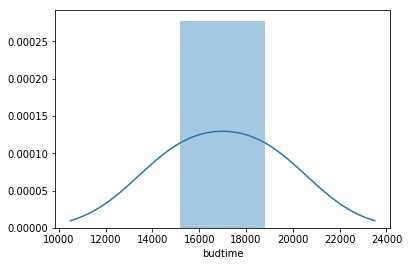

In [98]:
sns.distplot(buddf[(buddf.ga_budtime == 24400)&(buddf.budtime>0)]['budtime'])

In [55]:
np.mean(buddf[(buddf.ga_budtime == 13400)&(buddf.budtime>0)]['budtime'])

14948.046875

In [37]:
buddf[(buddf.ga_budtime >0)&(buddf.budtime>0)].sort_values('ga_budtime').sort_values('budtime')

,Unnamed: 0,name,ga_budtime,budtime
2362,2362,246080_14000_0_out,14000,6300
1366,1366,245212_14000_0_out,14000,7400
606,606,245801_11450_0_out,11450,8100
778,778,244356_13400_0_out,13400,8200
11,11,246530_14725_1_out,14725,8500
1435,1435,245362_16800_0_out,16800,8700
1483,1483,246514_13400_0_out,13400,8800
792,792,245315_13400_0_out,13400,8800
644,644,244120_13400_0_out,13400,8900
1376,1376,246369_14725_1_out,14725,9100


In [8]:
buddf[buddf.budtime >0].sort_values('budtime')

,Unnamed: 0,name,ga_budtime,budtime
2362,2362,246080_14000_0_out,14000,6300
1366,1366,245212_14000_0_out,14000,7400
606,606,245801_11450_0_out,11450,8100
778,778,244356_13400_0_out,13400,8200
2246,2246,244336_-1_0_out,-1,8300
11,11,246530_14725_1_out,14725,8500
2769,2769,243942_-1_0_out,-1,8600
1435,1435,245362_16800_0_out,16800,8700
792,792,245315_13400_0_out,13400,8800
1483,1483,246514_13400_0_out,13400,8800


In [3]:
basedir = "/Users/joelforster/Projects/optidb/clus/rebuilds"
budTimes = {}
for f in log_progress(filter(lambda x: 'csv' in x,os.listdir(basedir)),10):
    df = pd.read_csv(os.path.join(basedir,f))
    budTimes[f.split('.')[0]] = -1
    for t in df.timestep.unique():
        if len(filter(lambda x: x>25, df[df.timestep == t].c_cls.value_counts().values)) > 1:
            budTimes[f.split('.')[0]] = t
            break
            
print budTimes

KeyboardInterrupt: 

In [ ]:
data = []
for k,v in budTimes.iteritems():
    if k!='coverage':
        data.append((k,int(k.split("_")[1]),v))

In [ ]:
buddf = pd.DataFrame(data,columns=['name','ga_budtime','budtime'])

In [ ]:
buddf.to_csv('/Users/joelforster/Projects/optidb/clus/budtime.csv')

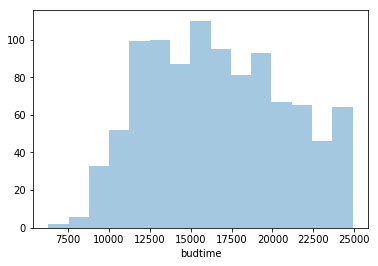

In [54]:
sns.distplot(buddf[buddf.budtime>0]['budtime'],kde=False)

In [57]:
np.mean(buddf[buddf.budtime>0]['budtime'].values)

16658.5

In [102]:
netdf = pd.read_csv('/Users/joelforster/Projects/optidb/clus/opti-net0.3.csv')

In [105]:
netdf.columns

Index([u'Ligand Number', u'Mean Affinity', u'Fitness', u'Mean Budding Time',
       u'Budding Rate', u'Density', u'Max Diameter', u'Mean Diameter',
       u'Min Diameter', u'Min Radius', u'Mean Radius', u'Max Radius',
       u'Max Average Shortest Path', u'Mean Average Shortest Path',
       u'Min Average Shortest Path', u'Subgraph Number',
       u'Estrada Coefficient', u'Pruning', u'Max SmallWorld',
       u'Mean SmallWorld', u'Min SmallWorld', u'Clustering Coefficient'],
      dtype='object')

In [108]:
optibuddf = pd.read_csv('/Users/joelforster/Projects/optidb/clus/traj.csv')

In [122]:
optibuddf

,den,cls,cat
0,0.190115,0.760521,budding
1,0.289383,0.805845,budding
2,0.423047,0.829006,budding
3,0.211135,0.791391,budding
4,0.149534,0.777860,budding
5,0.146943,0.756658,budding
6,0.386222,0.817681,budding
7,0.137777,0.750468,budding
8,0.246081,0.788018,budding
9,0.166343,0.753043,budding


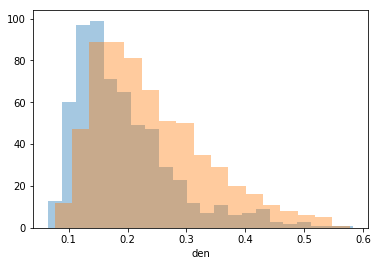

In [128]:
x = optibuddf[optibuddf.cat=='budding']['den']
y = optibuddf[optibuddf.cat=='non budding']['den']

sns.distplot(x,kde=False)
sns.distplot(y,kde=False)

In [129]:
from matplotlib.font_manager import findfont, FontProperties

In [130]:
font = findfont(FontProperties(family=['sans-serif']))

In [131]:
font

u'/Users/joelforster/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

/Users/joelforster/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


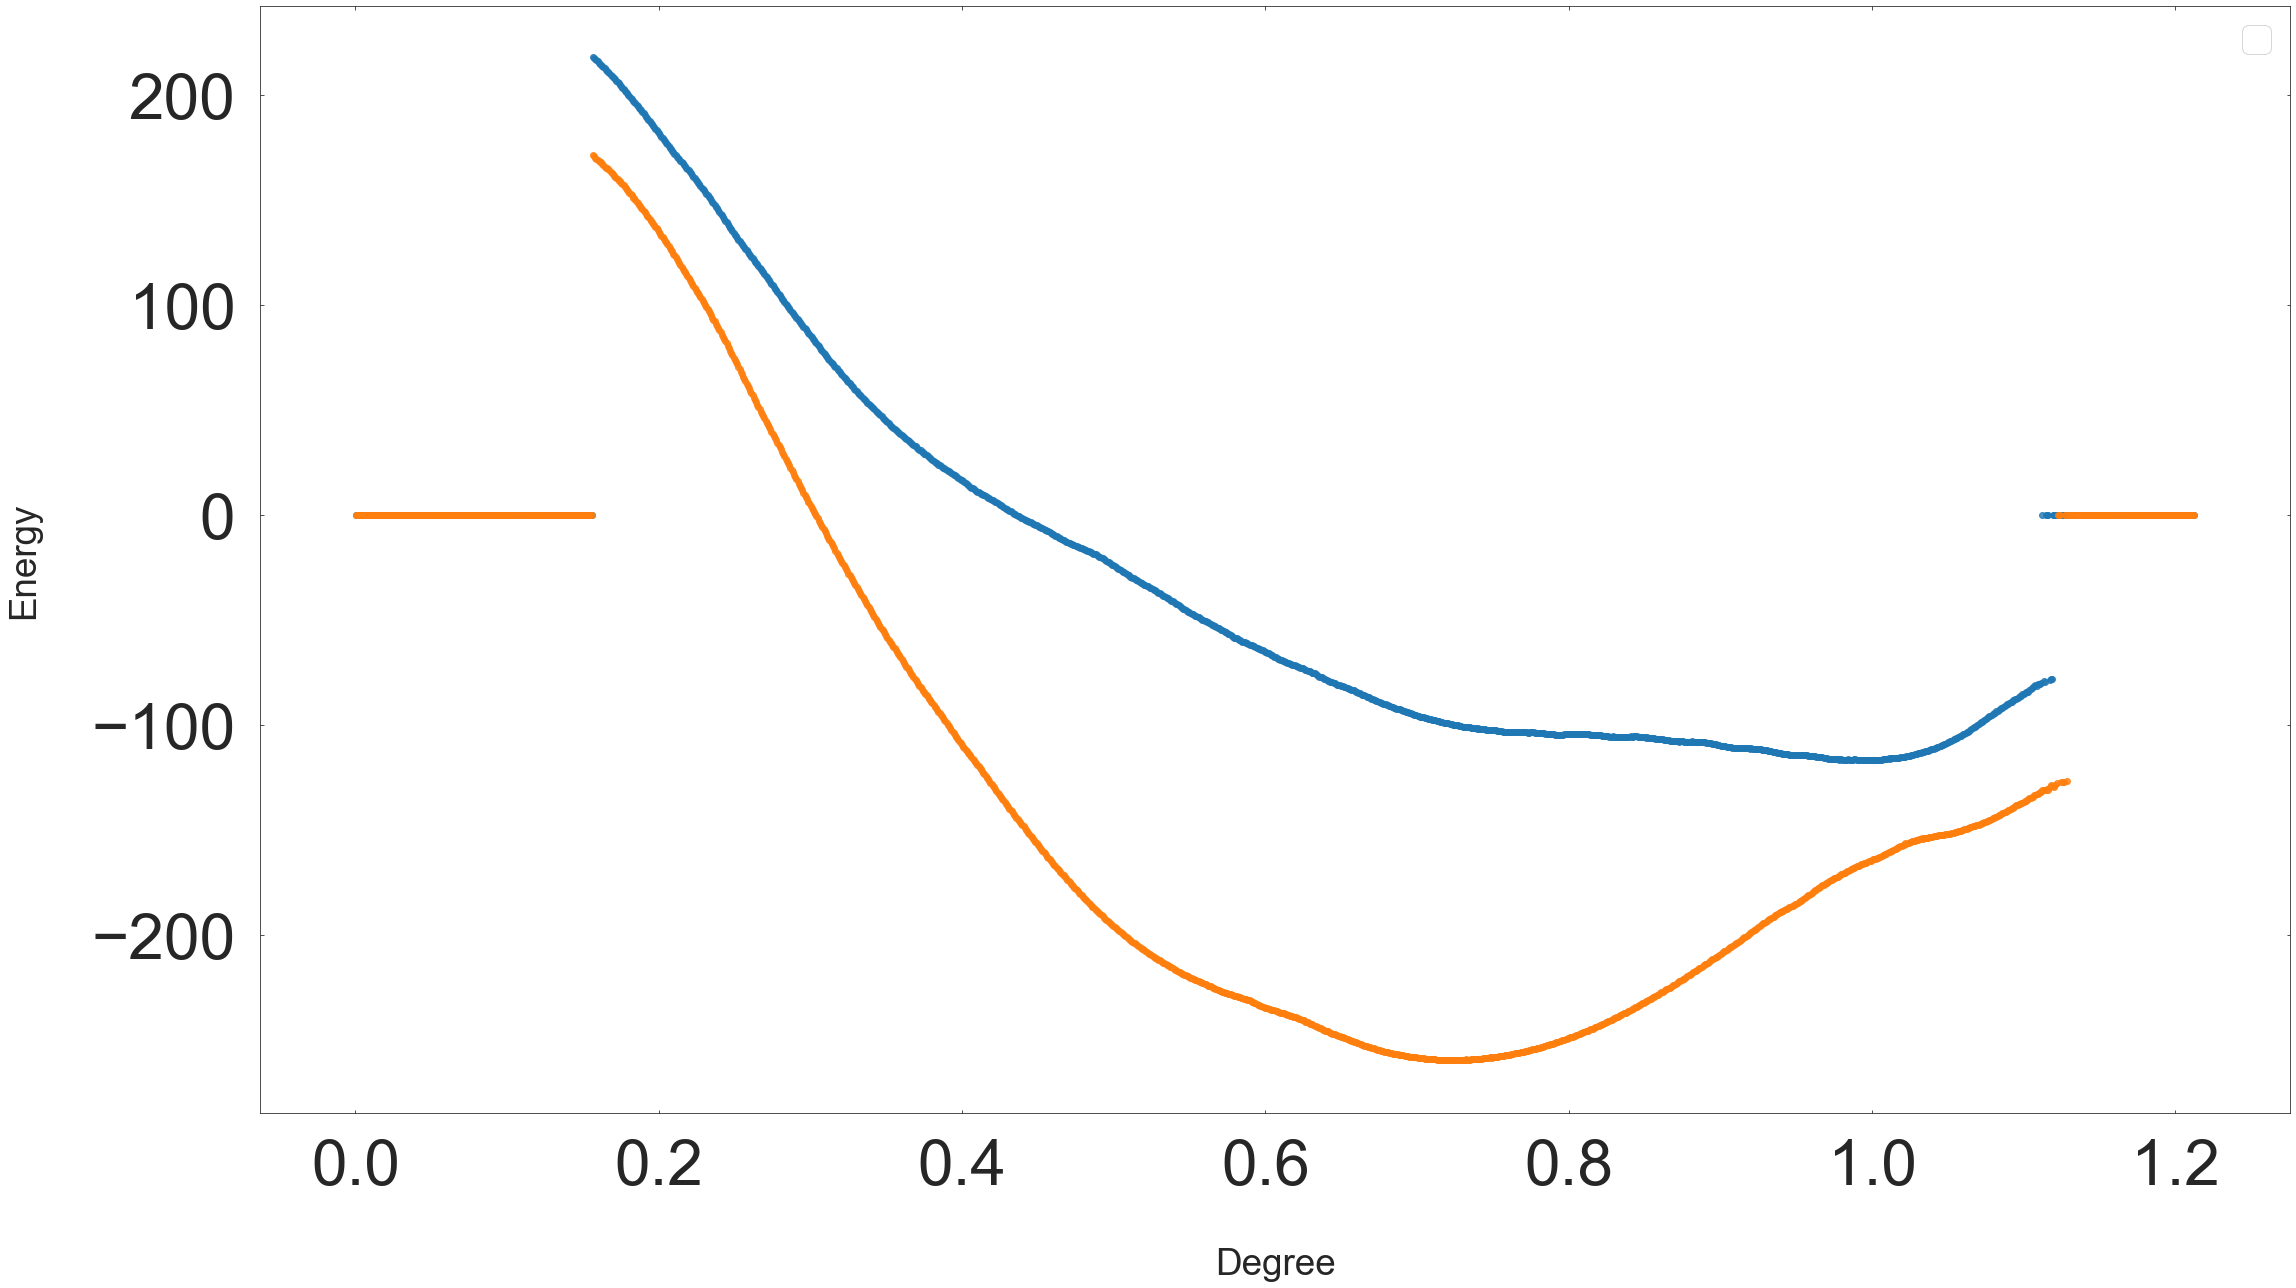